## GRIP Task 1

### Predict the percentage of the student based on the number of study hours.

#### Author - Shivani K
#### Batch - August 2024

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Loading the dataset

In [2]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

#### Basic EDA

In [3]:
df.shape

(25, 2)

In [4]:
df.size

50

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Both the columns are numerical in nature.

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking for duplicate rows

In [7]:
df.duplicated().sum()

0

#### Checking for null values

In [8]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

#### Univariate Analysis

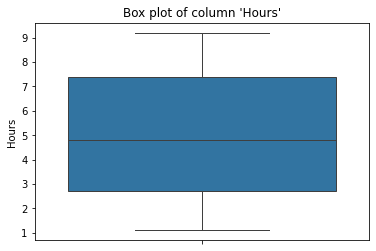

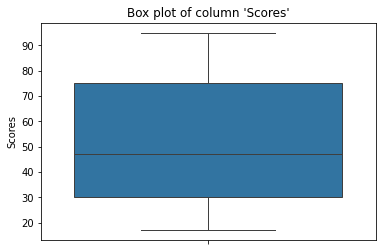

In [9]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(f"Box plot of column '{i}'")
    plt.show()

Visually, we cannot find the presence of any outliers in both the columns.

In [10]:
for i in df.columns:
    print(f"The skew value of column '{i}' is {df[i].skew()}")

The skew value of column 'Hours' is 0.1903382010052985
The skew value of column 'Scores' is 0.2339646665397317


Both the columns are very slightly positively skewed.

In [11]:
for i in df.columns:
    print(f"The kurtosis value of column '{i}' is {df[i].kurt()}")

The kurtosis value of column 'Hours' is -1.3023427663284237
The kurtosis value of column 'Scores' is -1.4438326250947935


Both the columns are platykurtic in nature.

#### Bivariate Analysis

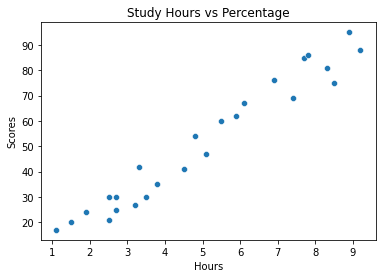

In [12]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title('Study Hours vs Student Score')
plt.show()

In [13]:
df[['Hours','Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The 'Hours' and 'Scores' columns are highly correlated with each other.

### Model Building

#### Train Test Split

In [14]:
x = df.drop(columns='Scores')
y = df['Scores'] # Target Variable

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=40)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(20, 1) (20,) (5, 1) (5,)


#### Training the model

In [16]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

#### Making predictions

In [17]:
ypred = lr.predict(xtest)

In [18]:
pd.DataFrame({'Actual' : ytest, 'Predicted' : ypred})

,Actual,Predicted
15,95,88.446633
24,86,77.732028
14,17,12.470343
19,69,73.835808
13,42,33.899553


#### Plotting the predicted line

In [19]:
coefficient = lr.coef_
intercept = lr.intercept_

line = df['Hours'].values * coefficient + intercept

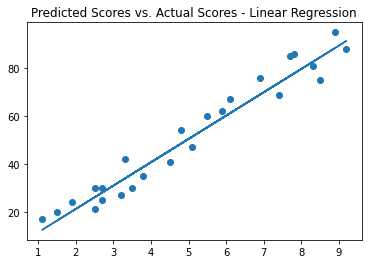

In [29]:
plt.scatter(df.Hours, df.Scores)
plt.plot(df.Hours, line)
plt.title ('Predicted Scores vs. Actual Scores - Linear Regression')
plt.show()

### Model Evaluation

In [21]:
print("Mean Absolute Error: ", mean_absolute_error(ytest, ypred))
print("Mean Squared Error: ", mean_squared_error(ytest, ypred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ytest, ypred)))
print("R2 Score: ", r2_score(ytest, ypred))

Mean Absolute Error:  6.457450193167183
Mean Squared Error:  44.1652107906905
Root Mean Squared Error:  6.645691144695975
R2 Score:  0.9466449081971943


The model demonstrates a strong ability to explain the variation in the dependent variable, as evidenced by the high R-squared value and lower MAE and RMSE values.

### What will be predicted score if a student studies for 9.25 hrs/day?

In [28]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{int(lr.predict(hours)[0])} will be predicted score if a student studies for 9.25 hrs in a day.")

91 will be predicted score if a student studies for 9.25 hrs in a day.
